<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
import pandas as pd

#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Download the webpage at the url


In [4]:
#your code goes here

data  = requests.get(url).text 

Create a soup object


In [5]:
#your code goes here

soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [8]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].getText() # store the value in column 3 as color_name
    color_code = cols[3].getText() # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Created By--->Average Annual Salary
Guido van Rossum--->$114,383
James Gosling--->$101,013
Robert Gentleman, Ross Ihaka--->$92,037
Netscape--->$110,981
Apple--->$130,801
Bjarne Stroustrup--->$113,865
Microsoft--->$88,726
Rasmus Lerdorf--->$84,727
Donald D. Chamberlin, Raymond F. Boyce.--->$84,793
Robert Griesemer, Ken Thompson, Rob Pike.--->$94,082


In [7]:
#your code goes here

popular_languages = []

table = soup.find('table') # in html table is represented by the tag <table>
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_avg_salary = cols[3].getText()
    print("{}--->{}".format(language_name, annual_avg_salary))
    popular_languages.append(str(language_name) + ' , ' + str(annual_avg_salary).replace('$','').replace(',',''))
    

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [9]:
# your code goes here

df = pd.DataFrame(popular_languages)
df.to_csv('popular_languages.csv', header=False, index=False)


In [10]:
df.rename(columns={0: 'placeholder'}, inplace=True)
df

,placeholder
0,"Language , Average Annual Salary"
1,"Python , 114383"
2,"Java , 101013"
3,"R , 92037"
4,"Javascript , 110981"
5,"Swift , 130801"
6,"C++ , 113865"
7,"C# , 88726"
8,"PHP , 84727"
9,"SQL , 84793"


In [11]:
df[['Language', 'Average Annual Salary']] = df['placeholder'].str.split(' , ', expand=True)
df.drop(columns = 'placeholder', inplace = True)
df.drop(index=0, inplace = True)
df

,Language,Average Annual Salary
1,Python,114383
2,Java,101013
3,R,92037
4,Javascript,110981
5,Swift,130801
6,C++,113865
7,C#,88726
8,PHP,84727
9,SQL,84793
10,Go,94082


In [12]:
df['Average Annual Salary'] = df['Average Annual Salary'].astype('int')

In [13]:
df.sort_values(by="Average Annual Salary", ascending=False, inplace=True)

In [14]:
df

,Language,Average Annual Salary
5,Swift,130801
1,Python,114383
6,C++,113865
4,Javascript,110981
2,Java,101013
10,Go,94082
3,R,92037
7,C#,88726
9,SQL,84793
8,PHP,84727


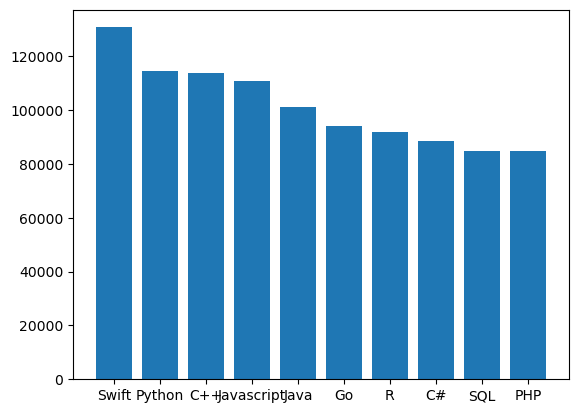

In [15]:
import matplotlib.pyplot as plt

fig = plt.bar(x='Language', height='Average Annual Salary', data=df)


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
